### Import All The Necessary Libraries

In [169]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize


### Declaring the 20 stocks and displaying the data from 2013 - end of 2022

In [170]:
# 5 stocks from each sectors
healthcare_stocks = ['LLY', 'JNJ', 'UNH', 'ABBV', 'TMO']
finance_stocks = ['BAC', 'JPM', 'V', 'WFC', 'MA']
technology_stocks = ['AAPL', 'MSFT', 'NVDA', 'ADBE', 'AVGO']
consumer_stocks = ['WMT', 'PG', 'COST', 'KO', 'PM']
all_stocks = healthcare_stocks + finance_stocks + technology_stocks + consumer_stocks

In [171]:
# Taking the Adjusted closing price from the data
healthcare_prices = yf.download(healthcare_stocks, start = "2013-01-01", end = '2023-01-01')['Adj Close']
finance_prices= yf.download(finance_stocks, start = "2013-01-01", end = '2023-01-01')['Adj Close']
technology_prices = yf.download(technology_stocks, start = "2013-01-01", end = '2023-01-01')['Adj Close']
consumer_prices = yf.download(consumer_stocks, start = "2013-01-01", end = '2023-01-01')['Adj Close']

combined_prices = yf.download(all_stocks, start = "2013-01-01", end = '2023-01-01')['Adj Close']

[*********************100%%**********************]  5 of 5 completed


[*********************100%%**********************]  5 of 5 completed
[*********************100%%**********************]  5 of 5 completed
[*********************100%%**********************]  5 of 5 completed
[*********************100%%**********************]  20 of 20 completed


In [172]:
# Displaying the data
print(healthcare_prices.head())
print(finance_prices.head())
print(technology_prices.head())
print(consumer_prices.head())

                 ABBV        JNJ        LLY        TMO        UNH
Date                                                             
2013-01-02  22.419838  52.369583  38.425724  62.571472  46.230911
2013-01-03  22.234707  52.295662  38.588707  62.378937  44.069408
2013-01-04  21.953814  52.894482  40.016769  62.927658  44.154160
2013-01-07  21.998501  52.783588  39.962440  63.418579  44.154160
2013-01-08  21.519720  52.790977  40.265118  63.023918  43.569294
                  BAC        JPM         MA          V        WFC
Date                                                             
2013-01-02   9.992598  33.084885  47.807560  35.941441  25.509893
2013-01-03   9.934454  33.018185  47.875961  35.969200  25.298832
2013-01-04  10.059049  33.603436  47.874081  36.262978  25.429834
2013-01-07  10.042438  33.640472  48.703739  36.522041  25.306103
2013-01-08   9.951065  33.707146  48.543427  36.862076  25.262442
                 AAPL       ADBE       AVGO       MSFT      NVDA
Date       

In [173]:
# Daily price returns of each stocks 
healthcare_returns = healthcare_prices.pct_change()
finance_returns = finance_prices.pct_change()
technology_returns = technology_prices.pct_change()
consumer_returns = consumer_prices.pct_change()
combined_returns = combined_prices.pct_change()

In [174]:
# Annualize returns and volatility Function
def annualize_rets(r, periods_per_year):
    compounded_growth = (1+r).prod()
    n_periods = r.shape[0]
    return compounded_growth**(periods_per_year/n_periods)-1
def annualize_vol(r, periods_per_year):
    return r.std()*(periods_per_year**0.5)


In [175]:
# Annualized Returns and Volatility
periods_per_year = 252
healthcare_annualized_returns = annualize_rets(healthcare_returns, periods_per_year)
finance_annualized_returns = annualize_rets(finance_returns, periods_per_year)
technology_annualized_returns = annualize_rets(technology_returns, periods_per_year)
consumer_annualized_returns = annualize_rets(consumer_returns, periods_per_year)

healthcare_annualized_volatility = annualize_vol(healthcare_returns, periods_per_year)
finance_annualized_volatility = annualize_vol(finance_returns, periods_per_year)
technology_annualized_volatility = annualize_vol(technology_returns, periods_per_year)
consumer_annualized_volatility = annualize_vol(consumer_returns, periods_per_year)


In [176]:
print("Healthcare Annualized Returns:", healthcare_annualized_returns)
print("Finance Annualized Returns:", finance_annualized_returns)
print("Technology Annualized Returns:", technology_annualized_returns)
print("Consumer Goods Annualized Returns:", consumer_annualized_returns)

Healthcare Annualized Returns: ABBV    0.213753
JNJ     0.126020
LLY     0.251751
TMO     0.242915
UNH     0.275063
dtype: float64
Finance Annualized Returns: BAC    0.124852
JPM    0.146969
MA     0.218930
V      0.191004
WFC    0.046142
dtype: float64
Technology Annualized Returns: AAPL    0.226728
ADBE    0.242831
AVGO    0.366073
MSFT    0.265682
NVDA    0.478486
dtype: float64
Consumer Goods Annualized Returns: COST    0.185538
KO      0.087750
PG      0.113524
PM      0.067107
WMT     0.098509
dtype: float64


In [177]:
print("Healthcare Annualized Volatility:", healthcare_annualized_volatility)
print("Finance Annualized Volatility:", finance_annualized_volatility)
print("Technology Annualized Volatility:", technology_annualized_volatility)
print("Consumer Goods Annualized Volatility:", consumer_annualized_volatility)

Healthcare Annualized Volatility: ABBV    0.271654
JNJ     0.176796
LLY     0.257154
TMO     0.242967
UNH     0.253458
dtype: float64
Finance Annualized Volatility: BAC    0.307505
JPM    0.268064
MA     0.273649
V      0.251833
WFC    0.295154
dtype: float64
Technology Annualized Volatility: AAPL    0.290626
ADBE    0.315261
AVGO    0.346119
MSFT    0.270340
NVDA    0.442733
dtype: float64
Consumer Goods Annualized Volatility: COST    0.208185
KO      0.181020
PG      0.183174
PM      0.225189
WMT     0.205491
dtype: float64


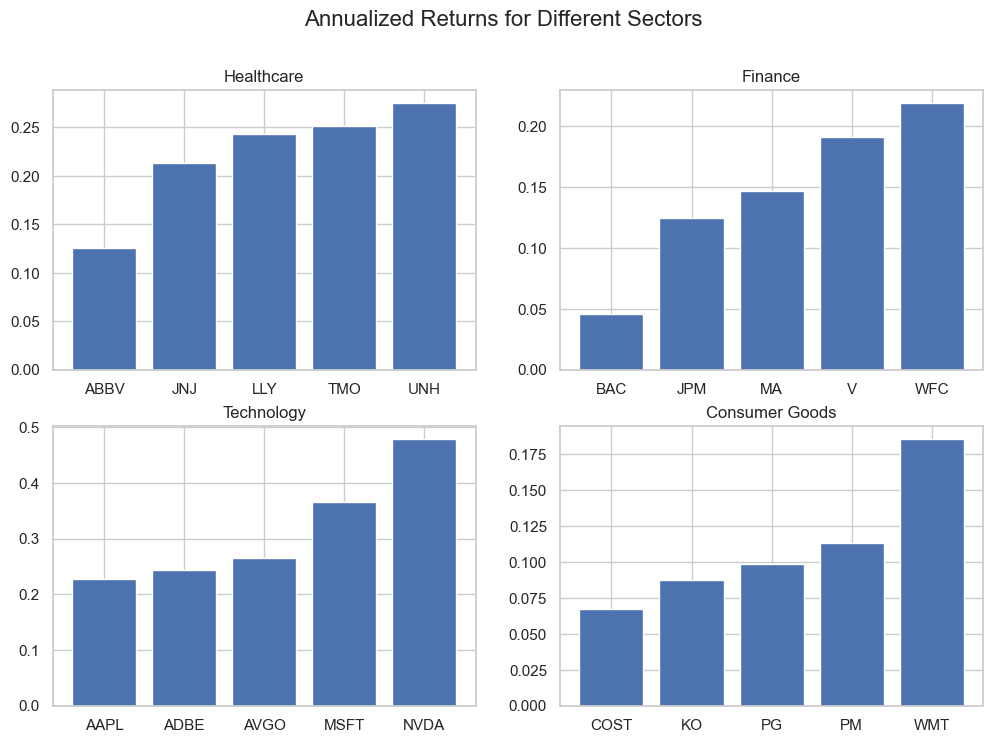

In [178]:
# Bar plot of every Stock accoding to their Sectors

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))
fig.suptitle('Annualized Returns for Different Sectors', fontsize=16)

axes[0, 0].bar(healthcare_annualized_returns.index, healthcare_annualized_returns.sort_values())
axes[0, 0].set_title('Healthcare')

axes[0, 1].bar(finance_annualized_returns.index, finance_annualized_returns.sort_values())
axes[0, 1].set_title('Finance')

axes[1, 0].bar(technology_annualized_returns.index, technology_annualized_returns.sort_values())
axes[1, 0].set_title('Technology')

axes[1, 1].bar(consumer_annualized_returns.index, consumer_annualized_returns.sort_values())
axes[1, 1].set_title('Consumer Goods')

plt.show()

### Combining the stocks to calculate the best and worst risk-returns(Sharpe Ratio)

In [179]:
stocks_data = pd.DataFrame({
    'Symbol': healthcare_stocks + finance_stocks + technology_stocks + consumer_stocks,
    'Annualized Return': healthcare_annualized_returns.tolist() + finance_annualized_returns.tolist() +
                          technology_annualized_returns.tolist() + consumer_annualized_returns.tolist(),
    'Annualized Volatility': healthcare_annualized_volatility.tolist() + finance_annualized_volatility.tolist() +
                             technology_annualized_volatility.tolist() + consumer_annualized_volatility.tolist()
})
stocks_data

,Symbol,Annualized Return,Annualized Volatility
0,LLY,0.213753,0.271654
1,JNJ,0.126020,0.176796
2,UNH,0.251751,0.257154
3,ABBV,0.242915,0.242967
4,TMO,0.275063,0.253458
5,BAC,0.124852,0.307505
6,JPM,0.146969,0.268064
7,V,0.218930,0.273649
8,WFC,0.191004,0.251833
9,MA,0.046142,0.295154


In [194]:
risk_free_rate = 0.01  # Assuming this is the Risk Free Rate, but it can be adjusted
stocks_data['Sharpe Ratio'] = (stocks_data['Annualized Return'] - risk_free_rate) / stocks_data['Annualized Volatility']

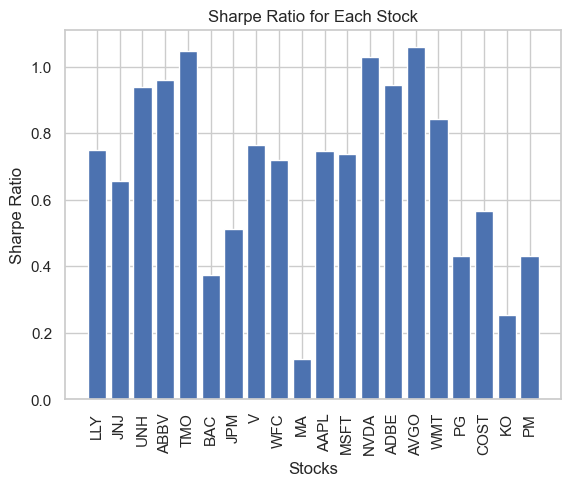

In [195]:
plt.bar(stocks_data['Symbol'], stocks_data['Sharpe Ratio'])
plt.xlabel('Stocks')
plt.xticks(rotation=90)
plt.ylabel('Sharpe Ratio')
plt.title('Sharpe Ratio for Each Stock')
plt.show()

In [196]:
best_stock = stocks_data.loc[stocks_data['Sharpe Ratio'].idxmax()]
worst_stock = stocks_data.loc[stocks_data['Sharpe Ratio'].idxmin()]

In [199]:
print("Stock with the Best Risk-Return Profile:")
print(best_stock["Symbol"])

print("\nStock with the Worst Risk-Return Profile:")
print(worst_stock["Symbol"])

Stock with the Best Risk-Return Profile:
AVGO

Stock with the Worst Risk-Return Profile:
MA


### Risk-Returns Vary with Sectors

In [184]:
sector_data = pd.DataFrame({
    'Sector': ['Healthcare', 'Finance', 'Tech', 'Consumer Goods'],
    'Average Annualized Return': [healthcare_annualized_returns.mean(), finance_annualized_returns.mean(),
                                   technology_annualized_returns.mean(), consumer_annualized_returns.mean()],
    'Average Annualized Volatility': [healthcare_annualized_volatility.mean(), finance_annualized_volatility.mean(),
                                       technology_annualized_volatility.mean(), consumer_annualized_volatility.mean()]
})


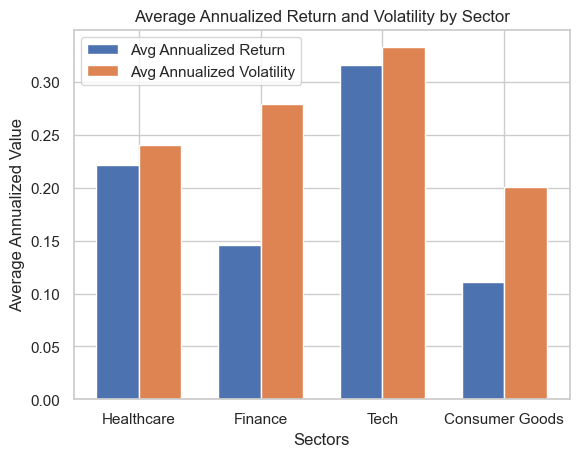

In [200]:
# Displaying the Annualized Returns and Volatility of each Sectors

bar_width = 0.35
index = np.arange(len(sector_data['Sector']))

plt.bar(index, sector_data['Average Annualized Return'], bar_width, label='Avg Annualized Return')
plt.bar(index + bar_width, sector_data['Average Annualized Volatility'], bar_width, label='Avg Annualized Volatility')

plt.xlabel('Sectors')
plt.ylabel('Average Annualized Value')
plt.title('Average Annualized Return and Volatility by Sector')
plt.xticks(index + bar_width / 2, sector_data['Sector'])
plt.legend()

plt.show()


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


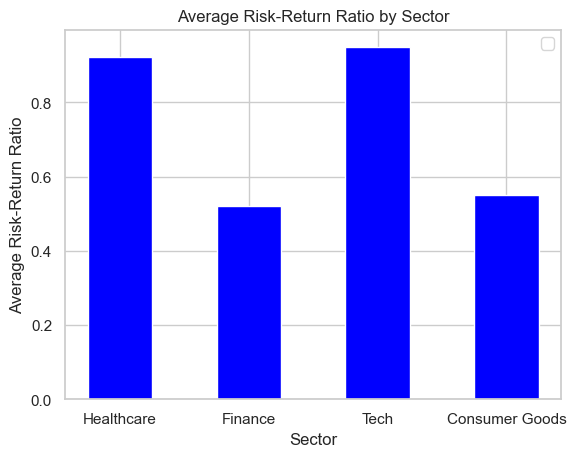

In [186]:
# Displaying the Risk-Return Ratio of the Sector

# Calculate the Average Risk Return Ratio
sector_data['Average Risk-Return Ratio'] = sector_data['Average Annualized Return'] / sector_data['Average Annualized Volatility']

bar_width = 0.5
index = np.arange(len(sector_data['Sector']))

plt.bar(index, sector_data['Average Risk-Return Ratio'], bar_width, color='blue')

plt.xlabel('Sector')
plt.ylabel('Average Risk-Return Ratio')
plt.title('Average Risk-Return Ratio by Sector')
plt.xticks(index, sector_data['Sector'])
plt.legend()

plt.show()


### Efficient Frontier

In [187]:
# All the necessary function for calculating the Efficient Frontier
def portfolio_return(weights, returns):
    """
    Computes the return on a portfolio from constituent returns and weights
    weights are a numpy array or Nx1 matrix and returns are a numpy array or Nx1 matrix
    """
    return weights.T @ returns


def portfolio_vol(weights, covmat):
    """
    Computes the vol of a portfolio from a covariance matrix and constituent weights
    weights are a numpy array or N x 1 maxtrix and covmat is an N x N matrix
    """
    return (weights.T @ covmat @ weights)**0.5

In [211]:

def minimize_vol(target_return, er, cov):
    """
    Returns the optimal weights that achieve the target return
    given a set of expected returns and a covariance matrix
    """
    n = er.shape[0]
    init_guess = np.repeat(1/n, n)
    bounds = ((0.0, 1.0),) * n # an N-tuple of 2-tuples!
    # construct the constraints
    weights_sum_to_1 = {'type': 'eq',
                        'fun': lambda weights: np.sum(weights) - 1
    }
    return_is_target = {'type': 'eq',
                        'args': (er,),
                        'fun': lambda weights, er: target_return - portfolio_return(weights,er)
    }
    weights = minimize(portfolio_vol, init_guess,
                       args=(cov,), method='SLSQP',
                       options={'disp': False},
                       constraints=(weights_sum_to_1,return_is_target),
                       bounds=bounds)
    return weights.x

In [212]:
def optimal_weights(n_points, er, cov):
    """
    Returns a list of weights that represent a grid of n_points on the efficient frontier
    """
    target_rs = np.linspace(er.min(), er.max(), n_points)
    weights = [minimize_vol(target_return, er, cov) for target_return in target_rs]
    return weights

In [213]:
def neg_sharpe(weights, riskfree_rate, er, cov):
        """
        Returns the negative of the sharpe ratio
        of the given portfolio
        """
        r = portfolio_return(weights, er)
        vol = portfolio_vol(weights, cov)
        return -(r - riskfree_rate)/vol
    
def msr(riskfree_rate, er, cov):
    """
    Returns the weights of the portfolio that gives you the maximum sharpe ratio
    given the riskfree rate and expected returns and a covariance matrix
    """
    n = er.shape[0]
    init_guess = np.repeat(1/n, n)
    bounds = ((0.0, 1.0),) * n # an N-tuple of 2-tuples!
    # construct the constraints
    weights_sum_to_1 = {'type': 'eq',
                        'fun': lambda weights: np.sum(weights) - 1
    }
    
    weights = minimize(neg_sharpe, init_guess,
                       args=(riskfree_rate, er, cov), method='SLSQP',
                       options={'disp': False},
                       constraints=(weights_sum_to_1,),
                       bounds=bounds)
    return weights.x


In [214]:
def plot_ef(n_points, er, cov, style='.-', legend=False, show_cml=False, riskfree_rate=0):
    """
    Plots the multi-asset efficient frontier
    """
    weights = optimal_weights(n_points, er, cov)
    rets = [portfolio_return(w, er) for w in weights]
    vols = [portfolio_vol(w, cov) for w in weights]
    ef = pd.DataFrame({
        "Returns": rets, 
        "Volatility": vols
    })
    ax = ef.plot.line(x="Volatility", y="Returns", style=style, legend=legend)
    if show_cml:
        ax.set_xlim(left = 0)
        # get MSR
        w_msr = msr(riskfree_rate, er, cov)
        r_msr = portfolio_return(w_msr, er)
        vol_msr = portfolio_vol(w_msr, cov)
        # add CML
        cml_x = [0, vol_msr]
        cml_y = [riskfree_rate, r_msr]
        ax.plot(cml_x, cml_y, color='green', marker='o', linestyle='dashed', linewidth=2, markersize=12)
    return ax

In [215]:
annulaize_rets_every_stocks = annualize_rets(combined_returns, 252)
covariance = combined_returns.cov()


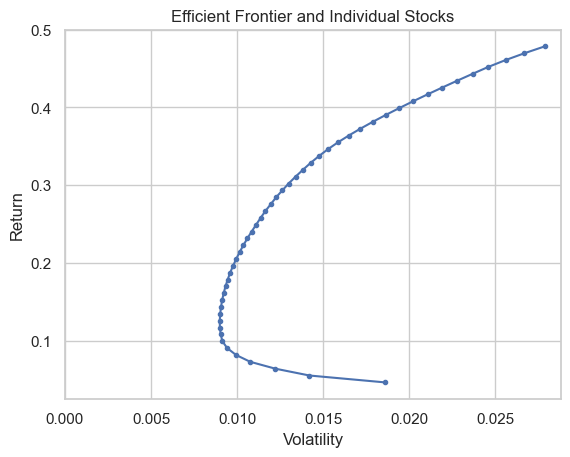

In [216]:
# Displaying the Efficient Frontier
number_of_points = 50
ax = plot_ef(number_of_points, annulaize_rets_every_stocks, covariance)
ax.set_xlim(left = 0)
plt.xlabel('Volatility')
plt.ylabel('Return')
plt.title('Efficient Frontier and Individual Stocks')

plt.show()

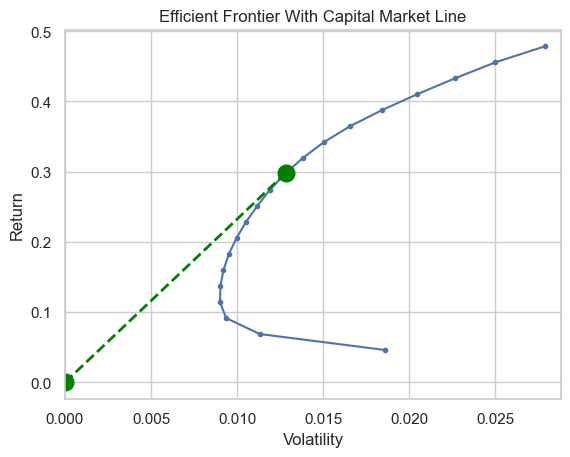

In [219]:
# Displaying the Efficient Frontier and also the CML
number_of_points = 20
ax = plot_ef(number_of_points, annulaize_rets_every_stocks, covariance, show_cml=True)
ax.set_xlim(left = 0)
plt.xlabel('Volatility')
plt.ylabel('Return')
plt.title('Efficient Frontier With Capital Market Line')

plt.show()

In [225]:
# The percentage of weight of each stock for Maximum Sharpe Ratio
stock_names = healthcare_stocks + finance_stocks + technology_stocks + consumer_stocks

w_msr = msr(0, annulaize_rets_every_stocks, covariance)

weights_dict = dict(zip(stock_names, w_msr*100))

print("Optimal Weights for Maximum Sharpe Ratio Portfolio:")
for stock, weight in weights_dict.items():
    print(f"{stock}: {weight:.4f}")


Optimal Weights for Maximum Sharpe Ratio Portfolio:
LLY: 0.0000
JNJ: 3.8102
UNH: 0.0000
ABBV: 14.5162
TMO: 0.0000
BAC: 11.0015
JPM: 0.0000
V: 0.0000
WFC: 0.0000
MA: 24.3262
AAPL: 0.0000
MSFT: 0.0000
NVDA: 14.9137
ADBE: 0.0000
AVGO: 0.0000
WMT: 7.7755
PG: 23.6568
COST: 0.0000
KO: 0.0000
PM: 0.0000
